<a href="https://colab.research.google.com/github/JimKing100/SF_Real_Estate_Project/blob/master/SF%20Map%20Code%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install libgeos
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (168 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131289 files and directories currently installed.)
Prep

     |████████████████████████████████| 2.8MB 2.9MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702069 sha256=2992bdf67cb705195712d444a0971dbf0357408c6b02047598915e2bf31c4b43
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.2.1
    Uninstalling pyproj-2.2.1:
      Successfully uninstalled pyproj-2.2.1


In [2]:
# Install fiona
!pip install fiona

     |████████████████████████████████| 17.9MB 2.8MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6613 sha256=19fd9fcfb1789265d370ca712cfc712701370ce322f4600bc51d2b32692956dc
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [3]:
# Install geopy
!pip install geopy

In [0]:
# Import libraries
import pandas as pd

from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

from descartes import PolygonPatch

from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

from itertools import chain
from geopy.geocoders import Nominatim
import fiona
import matplotlib.pyplot as plt

In [62]:
# Load SF real estate data
sf_data = pd.read_csv('https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/SF-SFR-Sales-Final1.csv')
print(sf_data.shape)
sf_data.head(20)

(23711, 30)


,longitude,latitude,full_address,city,state,street_no,street_name,street_nox,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_data,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,sf_source,sf_source_decs,sf,lot_acres,lot_sf,year_built,zoning
0,-122.466410,37.750183,"2038 10th Ave, San Francisco, CA 94116",San Francisco,CA,2038,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,3/29/12,302,799000,3/15/13,800000,6,2.00,2,T,Per Tax Records,1853,NaN,0,1935,RH1
1,-122.466420,37.750374,"2026 10th Ave, San Francisco, CA 94116",San Francisco,CA,2026,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,4/23/15,13,1100000,6/4/15,1415927,6,1.00,3,T,Per Tax Records,1350,0.0688,2996,1926,NaN
2,-122.466420,37.750183,"2039 10th Ave, San Francisco, CA 94116",San Francisco,CA,2039,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,3/7/13,102,1199000,6/18/13,1212750,10,4.00,4,O,Per Owner,2580,NaN,0,1951,RH1
3,-122.466430,37.750504,"2018 10th Ave, San Francisco, CA 94116",San Francisco,CA,2018,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,3/3/11,118,899000,7/7/11,763000,7,3.00,3,T,Per Tax Records,1515,NaN,0,1924,RH1
4,-122.466440,37.750470,"2021 10th Ave, San Francisco, CA 94116",San Francisco,CA,2021,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,10/14/10,39,949000,12/3/10,932000,0,2.00,3,U,Not Available,0,NaN,0,1938,NaN
5,-122.466446,37.750570,"2015 10th Ave, San Francisco, CA 94116",San Francisco,CA,2015,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,1/2/15,14,895000,2/20/15,1000000,0,1.00,2,O,Per Owner,1018,0.0941,4098,1956,NaN
6,-122.466450,37.750790,"2000 10th Ave, San Francisco, CA 94116",San Francisco,CA,2000,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,6/26/14,18,929000,8/1/14,1200000,6,2.25,3,U,Not Available,0,0.0474,2063,1929,RH1
7,-122.466490,37.751347,"1982 10th, San Francisco, CA 94116",San Francisco,CA,1982,10th,NaN,NaN,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,3/27/11,72,849000,6/10/11,830000,7,3.00,3,T,Per Tax Records,1668,NaN,0,1941,RH1
8,-122.466520,37.751568,"1969 10th Ave, San Francisco, CA 94116",San Francisco,CA,1969,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,3/4/10,47,788000,5/7/10,721000,7,1.00,2,T,Per Tax Records,1430,NaN,0,1936,NaN
9,-122.466540,37.751793,"1955 10th Ave, San Francisco, CA 94116-1332",San Francisco,CA,1955,10th,NaN,Ave,94116,2010,2,SF District 2,2010,2 - Golden Gate Heights,5/9/14,49,799000,8/20/14,830000,4,1.00,1,U,Not Available,0,NaN,0,0,RH1


In [0]:
#for i in range(1000, 1400):
#  geolocator = Nominatim(user_agent='Test')
#  location = geolocator.geocode(sf_data.loc[i, 'full_address'], timeout=None)
#  if location:
#    sf_data.loc[i, 'latitude'] = location.latitude
#    sf_data.loc[i, 'longitude'] = location.longitude

In [63]:
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp?raw=true'
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.dbf?raw=true'
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.prj?raw=true'
!wget 'https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shx?raw=true'

--2019-08-04 00:15:13--  https://github.com/JimKing100/SF_Real_Estate_Project/blob/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/JimKing100/SF_Real_Estate_Project/raw/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp [following]
--2019-08-04 00:15:13--  https://github.com/JimKing100/SF_Real_Estate_Project/raw/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp [following]
--2019-08-04 00:15:13--  https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/geo_export_965a7270-cc48-41f8

In [0]:
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.dbf?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.dbf
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.prj?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.prj
!mv '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shx?raw=true' /content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shx

In [0]:
shp = fiona.open('/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp')

In [0]:
# Extract map boundaries
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
# width, height of map
w, h = coords[2] - coords[0], coords[3] - coords[1]

In [0]:
m = Basemap(
    projection='tmerc',
    lon_0=-122.,
    lat_0=37.7,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

(92,
 5,
 [-122.51494807968153, 37.70808933741858, 0.0, 0.0],
 [-122.35696603928594, 37.811573987414484, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7fa9b42de358>)

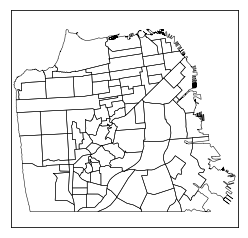

In [68]:
m.readshapefile(
    '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898',
    'SF',
    color='black',
    zorder=2)

In [69]:
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.SF],
    'nbrhood_name': [nbrhood['nbrhood'] for nbrhood in m.SF_info]})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
# Draw neighborhoods with polygons
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x,
    fc='#808080',
    ec='#ffffff', lw=.5, alpha=1,
    zorder=4))

df_map.sample(n=5)

,poly,nbrhood_name,area_m,area_km,patches
6,"POLYGON ((2234.036215796994 8090.570100551387,...",Central Richmond,2.210037e+06,22.100374,"PathPatch13((2234.04, 8090.57) ...)"
69,"POLYGON ((5952.38757600759 7695.093876131901, ...",Cole Valley/Parnassus Heights,6.615817e+05,6.615817,"PathPatch36((5952.39, 7695.09) ...)"
13,"POLYGON ((10016.47285092327 9775.81380744023, ...",Downtown,8.505431e+05,8.505431,"PathPatch27((10016.5, 9775.81) ...)"
39,"POLYGON ((3667.550380420267 3438.655305271242,...",Lake Shore,6.448719e+06,64.487192,"PathPatch224((3667.55, 3438.66) ...)"
61,"POLYGON ((9635.54210236307 12059.92596214951, ...",North Waterfront,9.773787e+05,9.773787,"PathPatch1071((9635.54, 12059.9) ...)"


In [0]:

# Create Point objects in map coordinates from dataframe lon and lat values
map_points = pd.Series([Point(m(mapped_x,mapped_y)) for mapped_x, mapped_y in zip(sf_data['longitude'],sf_data['latitude'])])
plt_points = MultiPoint(list(map_points.values))
#hoods_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
#pts = filter(hoods_polygon.contains,plt_points)
    

<Figure size 432x288 with 0 Axes>

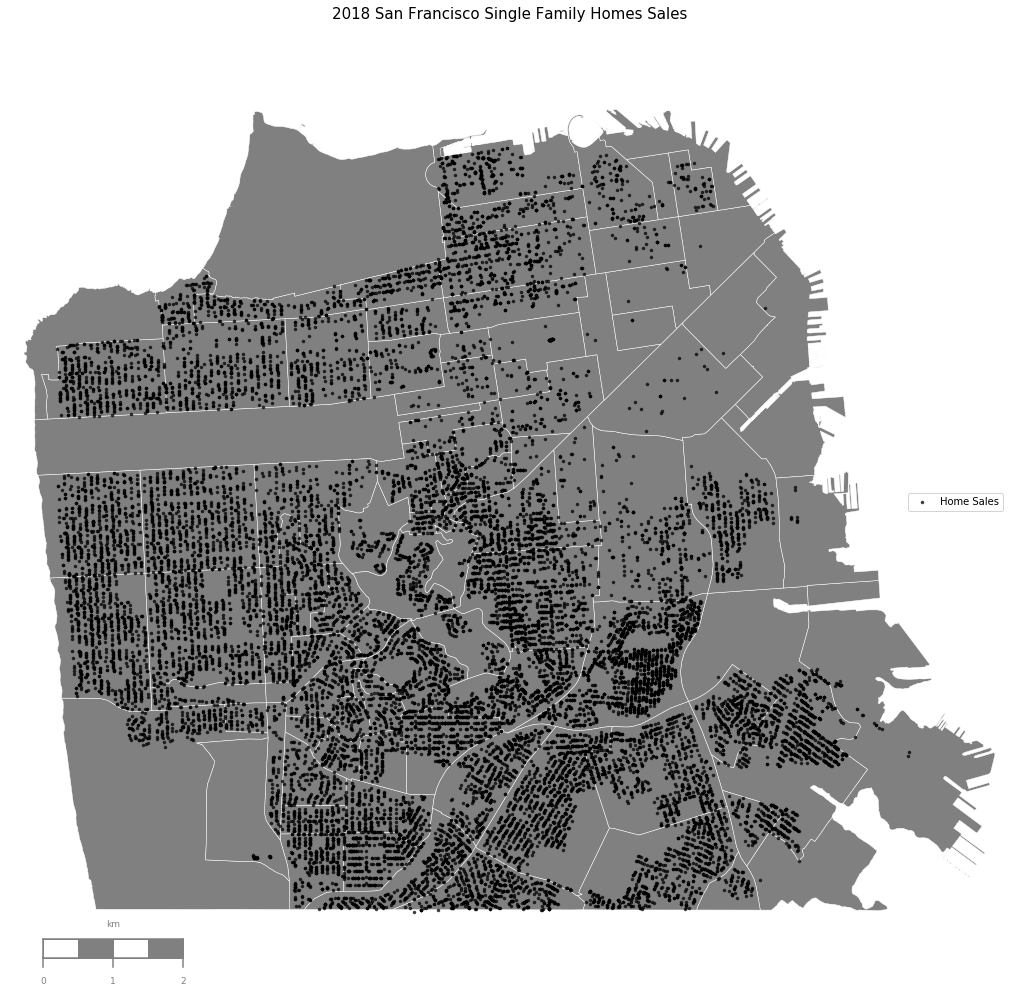

In [73]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)

dev = m.scatter(
    [geom.x for geom in map_points],
    [geom.y for geom in map_points],
    10, marker='o', lw=.25,
    facecolor='black', edgecolor='black',
    alpha=0.75, antialiased=True,
    label='Home Sales', zorder=3)

ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))


m.drawmapscale(
    coords[0] + 0.015, coords[1] - 0.005,
    coords[0], coords[1],
    2.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#808080',
    fontcolor='#808080',
    zorder=5)

plt.tight_layout()
plt.legend(loc="center right")
plt.title("2018 San Francisco Single Family Homes Sales", size=15)
fig.set_size_inches(15,15)
plt.show()